In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/MyDrive/face_age_K.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/adult_and_teen'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
print(train_dir)   
print(validation_dir) 
print(test_dir) 

/content/adult_and_teen/train
/content/adult_and_teen/validation
/content/adult_and_teen/test


In [ ]:
train_adult_dir = os.path.join(train_dir,'adult_train')
train_teen_dir = os.path.join(train_dir,'teen_train')
print(train_adult_dir)     
print(train_teen_dir)      

/content/adult_and_teen/train/adult_train
/content/adult_and_teen/train/teen_train


In [ ]:
validation_adult_dir = os.path.join(validation_dir,'adult_validation')
validation_teen_dir = os.path.join(validation_dir,'teen_validation')
print(validation_adult_dir) 
print(validation_teen_dir)      

/content/adult_and_teen/validation/adult_validation
/content/adult_and_teen/validation/teen_validation


In [ ]:
test_adult_dir = os.path.join(test_dir,'adult_test')
test_teen_dir = os.path.join(test_dir,'teen_test')
print(test_adult_dir) 
print(test_teen_dir)

/content/adult_and_teen/test/adult_test
/content/adult_and_teen/test/teen_test


In [ ]:
train_adult_fnames=os.listdir(train_adult_dir)
train_teen_fnames=os.listdir(train_teen_dir)

print(train_adult_fnames[:5])
print(train_teen_fnames[:5])

['5585.png', '5658.png', '3853.png', '3989.png', '3851.png']
['6924.png', '6704.png', '3934.png', '3452.png', '6781.png']


In [ ]:
print("학습용 성인 사진의 수:",len(train_adult_fnames))
print("학습용 학생 사진의 수:",len(train_teen_fnames))

학습용 성인 사진의 수: 2000
학습용 학생 사진의 수: 1000


In [ ]:
validation_adult_fnames = os.listdir(validation_adult_dir)
validation_teen_fnames = os.listdir(validation_teen_dir)

print(validation_adult_fnames[:5])
print(validation_teen_fnames[:5])

['8706.png', '8349.png', '6916.png', '9186.png', '8968.png']
['7465.png', '7768.png', '9577.png', '7983.png', '7813.png']


In [ ]:
print("검증용 성인 사진의 수:",len(validation_adult_fnames))
print("검증용 학생 사진의 수:",len(validation_teen_fnames))

검증용 성인 사진의 수: 1050
검증용 학생 사진의 수: 550


In [ ]:
test_adult_fnames = os.listdir(test_adult_dir)
test_teen_fnames = os.listdir(test_teen_dir)

print(test_adult_fnames[:5])
print(test_teen_fnames[:5])

['9776.png', '2209.png', '9743.png', '9737.png', '9761.png']
['1739.png', '1800.png', '1568.png', '1692.png', '1329.png']


In [ ]:
print("시험용 성인 사진의 수:",len(test_adult_fnames))
print("시험용 학생 사진의 수:",len(test_teen_fnames))

시험용 성인 사진의 수: 100
시험용 학생 사진의 수: 100


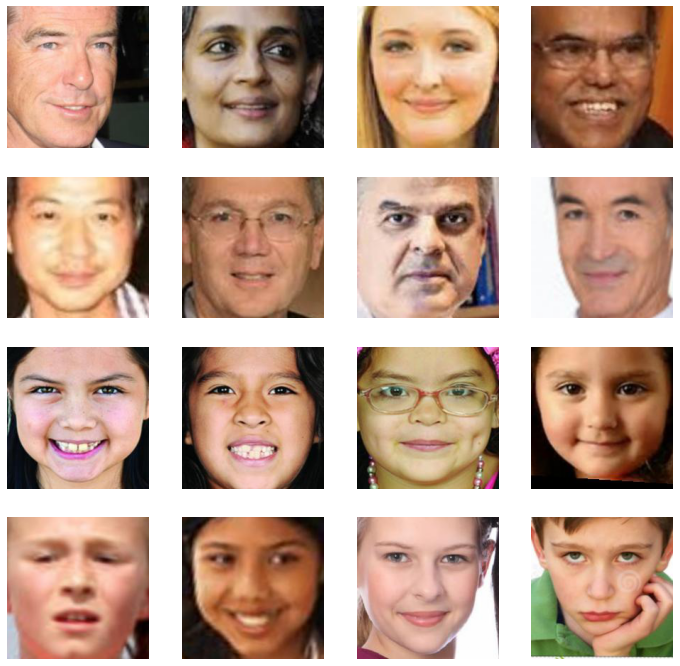

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_adult_pix = [os.path.join(train_adult_dir, fname)for fname in train_adult_fnames[ pic_index-8:pic_index]]

next_teen_pix = [os.path.join(train_teen_dir, fname)for fname in train_teen_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_adult_pix+next_teen_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode = 'binary')

Found 3000 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      target_size=(150,150),
                                                      class_mode = 'binary')

Found 1600 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  target_size=(150,150),
                                                  class_mode = 'binary')

Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

VGG = VGG16(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)
VGG.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [ ]:
for layer in VGG.layers[:-4]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Activation, Dropout, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
model = Sequential()
model.add(VGG)
model.add(Conv2D(128, (1, 1), activation='relu'))
model.add(MaxPool2D((1, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (1, 1), activation='relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', 
                 activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D((1, 1)))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=get_step(2000, 40),
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
50/50 [==============================] - 57s 863ms/step - loss: 1.3298 - acc: 0.6130 - val_loss: 0.8948 - val_acc: 0.7050
Epoch 2/50
50/50 [==============================] - 42s 852ms/step - loss: 0.8492 - acc: 0.6760 - val_loss: 0.8006 - val_acc: 0.6820
Epoch 3/50
50/50 [==============================] - 43s 855ms/step - loss: 0.7886 - acc: 0.6980 - val_loss: 0.7608 - val_acc: 0.7240
Epoch 4/50
50/50 [==============================] - 42s 850ms/step - loss: 0.7462 - acc: 0.7110 - val_loss: 0.8176 - val_acc: 0.5840
Epoch 5/50
50/50 [==============================] - 43s 855ms/step - loss: 0.6958 - acc: 0.7370 - val_loss: 0.6512 - val_acc: 0.7340
Epoch 6/50
50/50 [==============================] - 43s 854ms/step - loss: 0.6437 - acc: 0.7510 - val_loss: 0.5959 - val_acc: 0.8050
Epoch 7/50
50/50 [==============================] - 43s 857ms/step - loss: 0.6133 - acc: 0.7800 - val_loss: 0.5916 - val_acc: 0.8000
Epoch 8/50
50/50 [==============================] - 43s 854ms/step - 

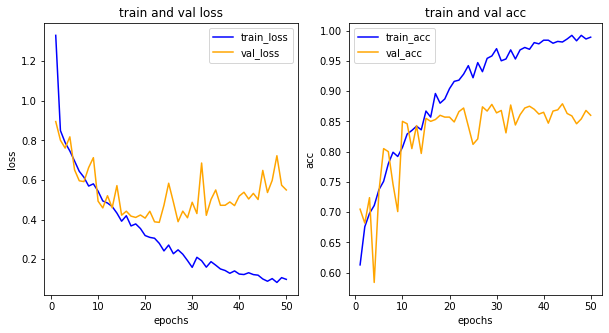

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(test_generator)

10/10 [==============================] - 2s 223ms/step - loss: 0.5805 - acc: 0.8550


[0.5804513096809387, 0.8550000190734863]